In [24]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from urllib.parse import quote_plus
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.font_manager as font_manager

In [28]:
def crawl_naver_news(keywords, start_date, end_date):
    news_data = []
    base_url = "https://search.naver.com/search.naver"
    date_format = "%Y.%m.%d"
    
    for keyword in tqdm(keywords, desc="키워드별 진행"):
        current_start_date = start_date
        total_days = (end_date - start_date).days + 1
        for _ in tqdm(range(total_days), desc=f"{keyword} 뉴스 크롤링"):
            params = {
                'where': 'news',
                'query': keyword,
                'sm': 'tab_opt',
                'sort': '0',
                'photo': '0',
                'field': '0',
                'reporter_article': '',
                'pd': '3',
                'ds': current_start_date.strftime(date_format),
                'de': current_start_date.strftime(date_format),
                'docid': '',
                'nso': 'so:r,p:from{}to{},a:all'.format(current_start_date.strftime("%Y%m%d"), current_start_date.strftime("%Y%m%d")),
                'start': 1,
            }
            
            response = requests.get(base_url, params=params)
            soup = BeautifulSoup(response.text, 'html.parser')
            news_items = soup.select('a.news_tit')
            
            for item in news_items:
                title = item.get('title')
                url = item.get('href')
                news_data.append({'keyword': keyword, 'title': title, 'url': url})

            time.sleep(3)
            current_start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

    return pd.DataFrame(news_data)

keywords = ["한국", "경제", "금융", "위기", "외국인", "기관"]
start_date = pd.to_datetime("2009-01-01")
end_date = pd.to_datetime("2009-12-31")
df_news = crawl_naver_news(keywords, start_date, end_date)
print(df_news)

키워드별 진행: 100%|██████████| 6/6 [1:54:52<00:00, 1148.80s/it]

     keyword                            title  \
0         한국    ‘한국 기후변화 과제 지원 기대’ 유엔 潘총장 신년사   
1         한국         [데스크 칼럼] 다문화가 한국의 미래 가른다   
2         한국         한국 경제, 재도약 꿈꾼다…우리의 현주소는?   
3         한국       2009 기축년, 한국영화 美 공략 원년 될까?   
4         한국      [기업이 희망이다] ① 한국경제 불을 다시 지피다   
...      ...                              ...   
6325      경제                   경제석학 이론 고민해보세요   
6326      경제          사르코지 "유럽대륙식 경제모델 승리할 것"   
6327      경제            대우일렉 광주이전 경제적 파급 효과는?   
6328      경제  <경제브리핑> 외환보유액 2천700억달러 돌파…사상 최대   
6329      경제           KIET, 내년 경제성장률 4.8% 전망   

                                                    url  
0     https://n.news.naver.com/mnews/article/003/000...  
1     http://news.mk.co.kr/news_forward.php?no=1002&...  
2     http://news.sbs.co.kr/section_news/news_read.j...  
3     http://www.asiae.co.kr/uhtml/read.jsp?idxno=46...  
4      http://www.ytn.co.kr/_ln/0103_200901011007428175  
...                                                 ...  
6325 

In [23]:
# def crawl_naver_news(keywords, start_date, end_date):
#     news_data = []
#     base_url = "https://search.naver.com/search.naver"
#     date_format = "%Y.%m.%d"
    
#     for keyword in keywords:
#         current_start_date = start_date
#         while current_start_date <= end_date:
#             params = {
#                 'where': 'news',
#                 'query': keyword,
#                 'sm': 'tab_opt',
#                 'sort': '0',
#                 'photo': '0',
#                 'field': '0',
#                 'reporter_article': '',
#                 'pd': '3',
#                 'ds': current_start_date.strftime(date_format),
#                 'de': current_start_date.strftime(date_format),
#                 'docid': '',
#                 'nso': 'so:r,p:from{}to{},a:all'.format(current_start_date.strftime("%Y%m%d"), current_start_date.strftime("%Y%m%d")),
#                 'start': 1,
#             }
            
#             response = requests.get(base_url, params=params)
#             soup = BeautifulSoup(response.text, 'html.parser')
#             news_items = soup.select('a.news_tit')
            
#             for item in news_items:
#                 title = item.get('title')
#                 url = item.get('href')
#                 news_data.append({'keyword': keyword, 'title': title, 'url': url})

#                 time.sleep(3)
            
#             # 한 페이지에 모든 결과가 나올 것으로 예상되지만, 필요에 따라 페이지네이션을 처리하는 로직 추가 가능
#             current_start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

#     return pd.DataFrame(news_data)

# keywords = ["한국", "경제", "금융", "위기", "외국인", "기관"]
# start_date = pd.to_datetime("2009-01-01")
# end_date = pd.to_datetime("2009-12-31")
# df_news = crawl_naver_news(keywords, start_date, end_date)
# print(df_news)


KeyboardInterrupt: 

In [ ]:
# def crawl_naver_news(keyword, start_date, end_date):
#     news_data = []
#     base_url = "https://search.naver.com/search.naver"
#     date_format = "%Y.%m.%d"
    
#     while start_date <= end_date:
#         params = {
#             'where': 'news',
#             'query': keyword,
#             'sm': 'tab_opt',
#             'sort': '0',
#             'photo': '0',
#             'field': '0',
#             'reporter_article': '',
#             'pd': '3',
#             'ds': start_date.strftime(date_format),
#             'de': start_date.strftime(date_format),
#             'docid': '',
#             'nso': 'so:r,p:from{}to{},a:all'.format(start_date.strftime("%Y%m%d"), start_date.strftime("%Y%m%d")),
#             'start': 1,
#         }
        
#         response = requests.get(base_url, params=params)
#         soup = BeautifulSoup(response.text, 'html.parser')
#         news_items = soup.select('a.news_tit')
        
#         for item in news_items:
#             title = item.get('title')
#             url = item.get('href')
#             news_data.append({'title': title, 'url': url})

#             time.sleep(5)
        
#         # 한 페이지에 모든 결과가 나올 것으로 예상되지만, 필요에 따라 페이지네이션을 처리하는 로직 추가 가능
#         start_date += pd.Timedelta(days=1)  # 다음 날짜로 이동

#     return pd.DataFrame(news_data)

# keyword = "한국, 경제, 금융, 위기, 외국인, 기관"
# start_date = pd.to_datetime("2009-01-01")
# end_date = pd.to_datetime("2009-12-31")
# df_news = crawl_naver_news(keyword, start_date, end_date)
# print(df_news)

                                               title  \
0                                   외국인 한국 보는 눈 달라졌다   
1  “대규모 경기부양책, 신용 경색 완화정책 시급하다” 삼성경제연구소(SERI) 200...   
2             [Interview] 실물경제 회생 중책 맡은 이윤호 지식경제부 장관   
3                                    '위기설...위기는 없었다'   
4                               노후車 교체땐 최대 250만원 稅감면   
5                        [사설] ‘설’로 끝나가는 ‘3월 위기설’의 교훈   
6                      (희망+)(이젠 선진증시)④`현금인출기`체질을 바꾸자   
7                                환율 1330원대 진입…바닥은 어디   
8                                    "위기설...위기는 없었다"   
9                       <박재목 칼럼>헛짚은 ´3월 위기설´ 누가 책임지나   

                                                 url  
0  http://news.mk.co.kr/news_forward.php?no=18647...  
1  https://n.news.naver.com/mnews/article/262/000...  
2  https://n.news.naver.com/mnews/article/262/000...  
3   http://www.ytn.co.kr/_ln/0102_200903261735063860  
4  http://www.edaily.co.kr/news/newspath.asp?news...  
5  http://www.segye.com/Articles/News/Opinion/Art... 

In [ ]:
# 데이터프레임을 CSV 파일로 저장
df_news.to_csv('/home/verlo/dev_ws/EDA/data/2009_naver_news.csv', index=False, encoding='utf-8-sig')

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv('/home/verlo/dev_ws/EDA/data/2009_naver_news.csv', encoding='utf-8-sig')
df

,title,url
0,외국인 한국 보는 눈 달라졌다,http://news.mk.co.kr/news_forward.php?no=18647...
1,"“대규모 경기부양책, 신용 경색 완화정책 시급하다” 삼성경제연구소(SERI) 200...",https://n.news.naver.com/mnews/article/262/000...
2,[Interview] 실물경제 회생 중책 맡은 이윤호 지식경제부 장관,https://n.news.naver.com/mnews/article/262/000...
3,'위기설...위기는 없었다',http://www.ytn.co.kr/_ln/0102_200903261735063860
4,노후車 교체땐 최대 250만원 稅감면,http://www.edaily.co.kr/news/newspath.asp?news...
5,[사설] ‘설’로 끝나가는 ‘3월 위기설’의 교훈,http://www.segye.com/Articles/News/Opinion/Art...
6,(희망+)(이젠 선진증시)④`현금인출기`체질을 바꾸자,http://www.edaily.co.kr/news/newspath.asp?news...
7,환율 1330원대 진입…바닥은 어디,http://www.moneytoday.co.kr/view/mtview.php?ty...
8,"""위기설...위기는 없었다""",http://www.ytn.co.kr/_ln/0102_200903270112046925
9,<박재목 칼럼>헛짚은 ´3월 위기설´ 누가 책임지나,http://www.dailian.co.kr/news/n_view.html?id=1...


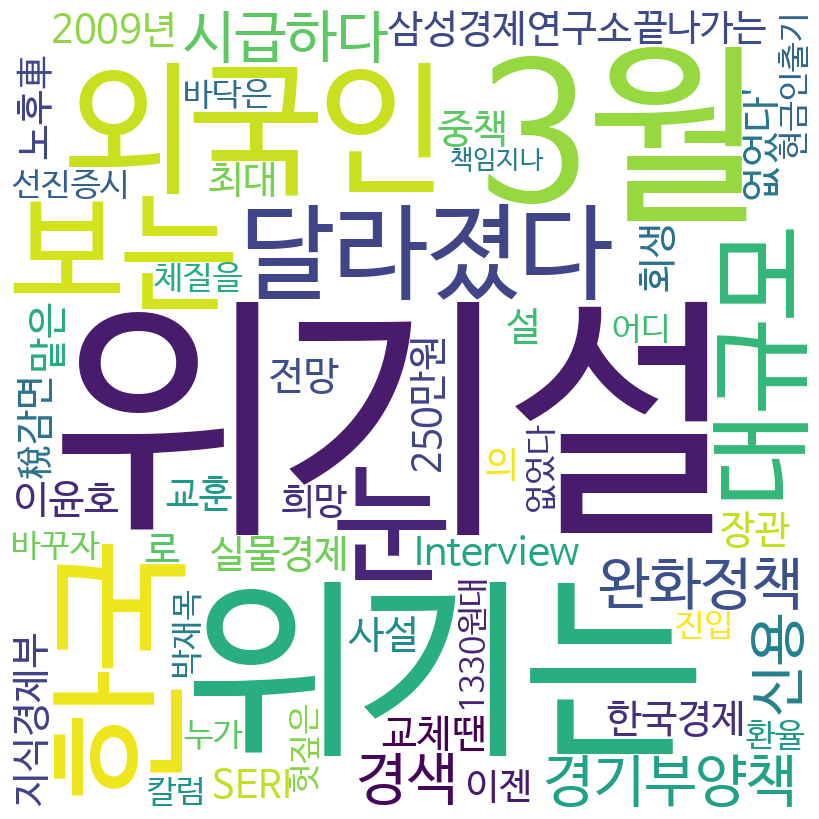

In [ ]:
# CSV 파일 읽기
df = pd.read_csv('/home/verlo/dev_ws/EDA/data/2009_naver_news.csv', encoding='utf-8-sig')

# 워드 클라우드를 생성할 열 선택
text = ' '.join(df['title'].dropna())  # 'your_column'을 실제 열 이름으로 변경하세요.

# 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"  # 사용하고자 하는 한글 폰트 경로로 변경하세요.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드 클라우드 생성
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, font_path=font_path).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()